In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# cp - chest pain
# trestbps - blood prs
#fbs - sugar
#thalach - max heart rate
#chol - cholestrol

In [12]:
df = pd.read_csv(r"D:\Data Analysis\heart (1).csv")

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df[df['chol']>300].shape

(43, 14)

In [17]:
f = df[df['thal']==2]

In [18]:
f

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [19]:
f[f['target']==1].shape

(130, 14)

In [20]:
df.isna().sum() #No null values are present.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Text(0.5, 1.0, 'Age Distribution')

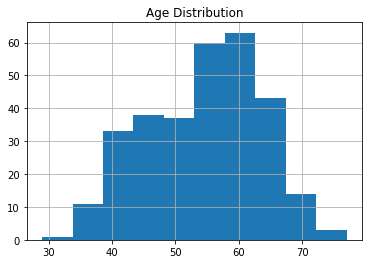

In [23]:
#Visualization
df['age'].hist(bins=10)
plt.title('Age Distribution')

In [24]:
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

C:\Users\Public\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Public\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


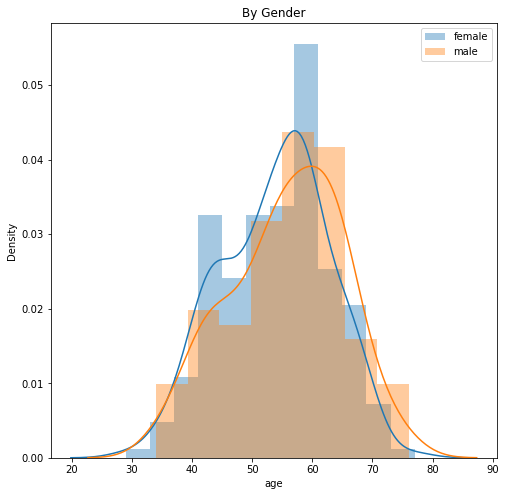

In [28]:
plt.figure(figsize=(8,8))
sns.distplot(df[df['sex']==1]['age'],label='female')
sns.distplot(df[df['sex']==0]['age'],label='male')
plt.legend()
plt.title('By Gender')
plt.show()

C:\Users\Public\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rest Blood Pressure')

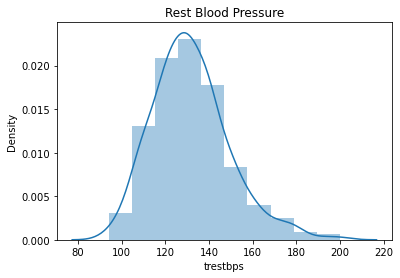

In [30]:
sns.distplot(df['trestbps'],bins=10)
plt.title('Rest Blood Pressure')

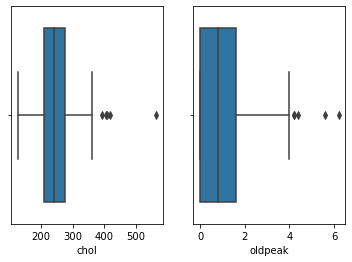

In [31]:
fig,axes = plt.subplots(nrows=1,ncols=2)
sns.boxplot(x='chol',data=df,orient='h',ax=axes[0])
sns.boxplot(x='oldpeak',data=df,orient='h',ax=axes[1])
plt.show()

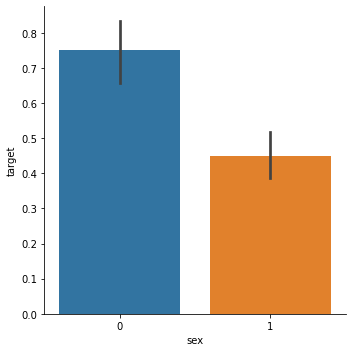

In [34]:
#for categorical data

sns.catplot(x='sex',y='target',data=df,kind='bar')

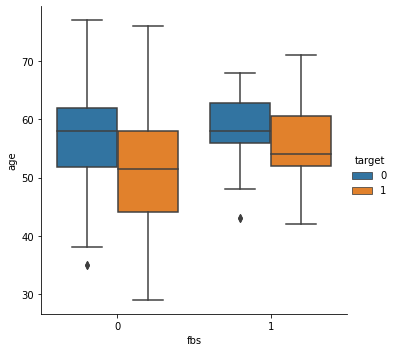

In [42]:
sns.catplot(x="fbs", y='age',data=df,hue='target',kind='box')

<AxesSubplot:>

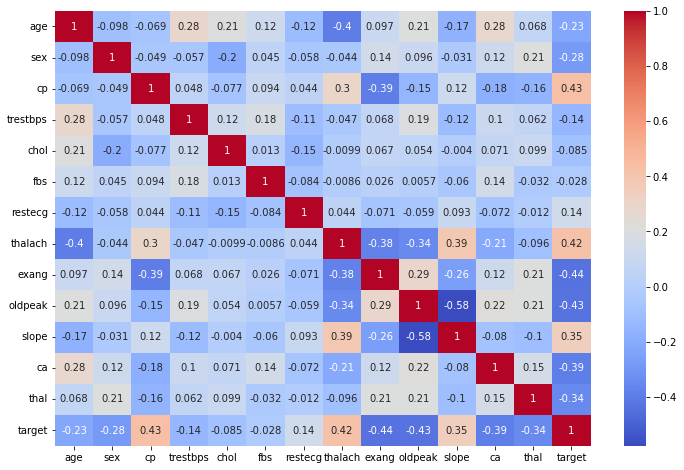

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [46]:
#to measure the strength and direction of correlation we use spearman 
corr_spear = df.corr(method='spearman')

<AxesSubplot:>

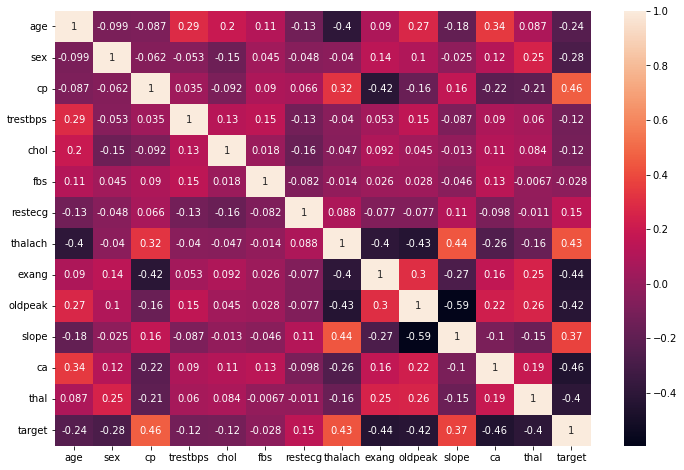

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_spear,annot=True)

In [6]:
# Krish Naik
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
%matplotlib inline

In [4]:
iris = load_iris()

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
classifier = DecisionTreeClassifier()
classifier.fit(iris.data,iris.target)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

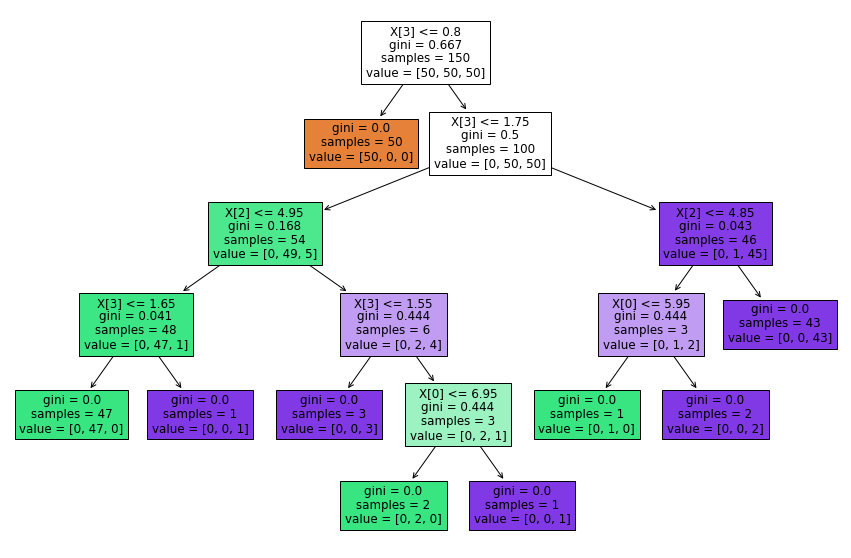

In [13]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True) 